### Distribución Espacial de las Descargas Eléctricas
***
Facultad de Ingeniería, Universidad Nacional de Asunción<br>
Laboratorio de Mecánica y Energía<br>
Est. Adriana A. Oviedo R.
***
##### Ubicación: Paraguay
*Coordenadas del área de estudio*
>-  -18,-64
>-  -18,-54
>-  -28,-64
>-  -28,-54
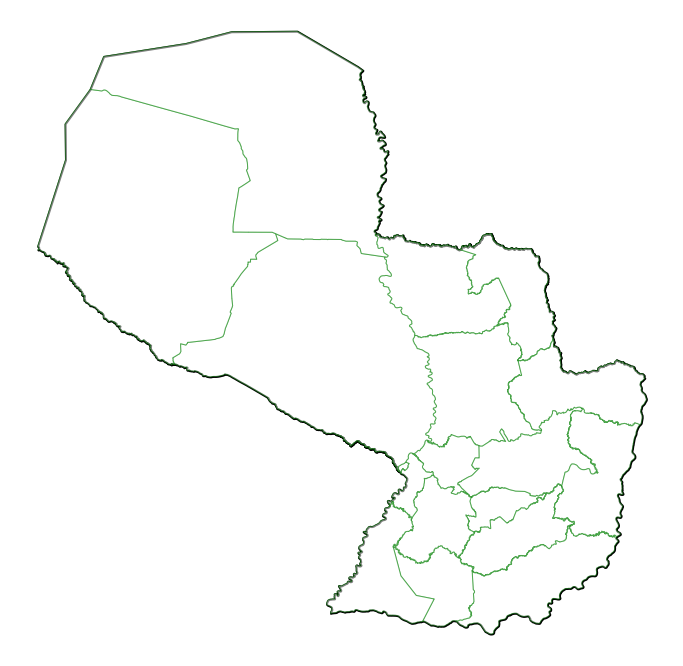
##### Periodo: 2019
##### Tipos de datos: Pulsos de descargas eléctricas
*Datos de la Dirección de Meterología e Hidrología - Paraguay*
* El timestamp de los datos indica el tiempo en el que ocurre el pulso de mayor amplitud del rayo
* Clasificación: Type
    -  "0": Cloud-to-Ground -> Descarga nube a tierra.
    -  "1": Intra-Cloud -> Descarga entre nubes; podrían indicar también otros tipos distintos de 
    las descargas CG.
    -  "9": Keep-Alive, función de los sensores para controlar su funcionamiento.
    -  "40": Provienen de otra institución, distinta a ENTLN.
* Altura: solamente indica la altura de las descargas tipo 1.
* Coordenadas: Latitud - Longitud (grados decimales)
* Polaridad: signo de la corriente máxima generada por la descarga
* Amplitud: magnitud de la corriente máxima generada por la descarga<br>
 *Datos de los mapas obtenidos del Instituto Nacional de Estadística*, descargables en:
> https://www.ine.gov.py/microdatos/cartografia-digital-2012.php
- Tipos de archivos: .shp (shapefiles)
- No posee solo contorno del Paraguay.

<div class="alert alert-block alert-info">
<b>Tip:</b> Para el uso de las librerías implementadas en este proyecto ver: https://www.earthdatascience.org/courses/intro-to-earth-data-science/</div>

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import box
import pandas as pd
import earthpy as et
import seaborn as sns

import warnings
warnings.filterwarnings('ignore', 'Geoseries.notna', UserWarning)

#Configuración de gráficos
sns.set(font_scale = 1.5, style = 'whitegrid')
#Configuración de directorio de trabajo
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

**Acceso a archivos .shp que contienen el contorno del país y de los departamentos en los que se divide:**
```python
mapa = gpd.read_file(mapa_ubi)


In [3]:
#Ubicaciones
pais_ubi = os.path.join('data', 'earthpy-downloads', 'rayos-paraguay',
                       'cartografia', 'contorno_Paraguay.shp')
dptos_ubi = os.path.join('data', 'earthpy-downloads', 'rayos-paraguay',
                       'cartografia', 'PAIS', 'Departamentos_Paraguay.shp')

In [4]:
#Acceso a datos de mapas
pais = gpd.read_file(pais_ubi)
dptos = gpd.read_file(dptos_ubi)
#Centroides de los polígonos que forman los departamentos, para tener una ubicación de los nombres para el gráfico
dptos_nombres = gpd.GeoDataFrame(dptos)
dptos_nombres = dptos_nombres.assign(geometry = dptos_nombres['geometry'].centroid)

C:\Users\AgOvi\AppData\Local\Temp\ipykernel_9432\1684741639.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dptos_nombres = dptos_nombres.assign(geometry = dptos_nombres['geometry'].centroid)


<div class="alert alert-block alert-info">
<b>Tip:</b> Utilizando listas, creamos listas anidadas con las ubicaciones de los archivos para más orden. Luego, utilizamos diccionarios para acceder por mes o por día a los archivos.</div>

In [10]:
#Definimos la dirección a la carpeta de los archivos de 2019
path = os.path.join('data', 'earthpy-downloads', 'rayos-paraguay',
                   'dmh', '2019\\')
list1 = [path + f for f in os.listdir(path) if f.startswith('output_')]
arch = []
for i in range(1, len(list1)+1):
    arch.append(str(i))
arch.sort()
list_arc = dict(zip(arch, list1))
dia = []
for f in range(1,32):
    dia.append(f)

Para los datos de las descargas, al ser archivos .csv utilizamos la librería pandas. Luego, teniendo las columnas de Latitud y Longitud utilizamos la función points_from_xy para obtener los datos en formato GeoDataFrame

```python
descarga_fecha = pd.read_csv(ubi)
coordenadas = gpd.points_from_xy(descarga_fecha.longitude, descarga_fecha.latitude)
d_fecha = gpd.GeoDataFrame(data = descarga_fecha, geometry = coordenadas)


Obtenemos los dataframes utilizando un loop que guarda en diccionarios y los convierte a GeoDataFrames. La forma de acceder a los gdf sería la siguiente: `desc18['mes'][dia]`, donde dia es un entero y mes una cadena.

In [7]:
desc = {}
for i in list_arc.keys():
    print(i)
    try:
        desc[i] = pd.read_csv(list_arc[i], parse_dates=['timestamp'],index_col=['timestamp'],
                      delimiter = ',', engine = 'python', on_bad_lines = 'warn')
        desc[i].index = pd.to_datetime(desc[i].index, infer_datetime_format = True)
    except Exception as e:
        print('\t error: ', i)        

1
10
100
101
102
103
104
105
106
107
108
109
11
110
111
112
113
114
115
116
117
118
119
12
120
121
122
123
124
125
126
127
128
129
13
130
131
132
133
134
135
136
137
138
139
14
140
141
142
143
144
145
146
147
148
149
15
150
151
152
153
154
155
156
157
158
159
16
160
161
162
163
164
165
166
167
168
169
17
170
171


Skipping line 103243: Expected 10 fields in line 103243, saw 18


172
173
174
175
176
177
178
179
18
180
181
182
183
184
185
186
187
188
189
19
190
191
192
193
194
195
196
197
198
199
2
20
200
201
202
203
204
205
206
207
208
209
21
210
211
212
213
214
215
216
217
218
219
22
220
221
222
223
224
225
226
227
228
229
23
230
231
232
233


Skipping line 110779: Expected 10 fields in line 110779, saw 17


234
235
236
237
238
239
24
240
241
242
243
244
245
246
247
248
249
25
250
251
252
253
254
255
256
257
258
259
26
260
261
262
263
264
265
266
267
268
269
27
270
271
272
273
274
275
276
277
278
279
28
280
281
282
283
284
285
286
287
288
289
29
290
291
292
293
294
295
296
297
298
299
3
30
300
301
302
303
304
305
306
307
308
309
31
310
311
312
313
314
315
316
317
318
319
32
320
321
322


Skipping line 112157: Expected 10 fields in line 112157, saw 18


323
324
325
326
327
328
329
33
330
331
332
333
334
335
336
337
338
339
34
340
341
342
343
344
345
346
347
348
349
35
350
351
352
353
354
355
356
357
358
359
36
360
361
362
363
364
365
366
367
368
369
37
370
371
372
373
374
375
376
377
378
379
38
380
381
382
383
384
385
386
387
388
389
39
390
391
392
393
394
395
396
397
398
399
4
40
400
401
402
403


Skipping line 103234: Expected 10 fields in line 103234, saw 11


404
405
406
407
408
409
41
410
411
412
413
414
415
416
417
418
419
42
420
421
422
423
424
425
426
427
428
429
43
430
431
432
433
434
435
436
437
438
439


Skipping line 108697: Expected 10 fields in line 108697, saw 11


44
440
441
442
443
444
445
446
447
448
449
45
450
451
452
453
454
455
456
457
458
459
46
460
461
462
463
464
465
466
467
468
469
47
470
471
472
473
474
475
476
477
478
479
48
480
481


Skipping line 141673: Expected 10 fields in line 141673, saw 14


482
483
484
485
486
487
488
489
49
490
491
492
493
494
495
496
497
498
499
5
50


Skipping line 133964: Expected 10 fields in line 133964, saw 11


500
501
502
503
504
505
506
507
508
509
51
510
511
512
513
514
515
516
517
518
519
52
520
521
522
523
524
525
526
527
528
529
53
530
531
532
533
534
535
536
537
538
539
54
540
541
542
543
544
545
546
547
548
549
55
550
551
552
553
554
555
556
557
558
559
56
560
561
562
563
564
565
566
567
568
569
57
570
571
572
573
574
575
576
577
578


Skipping line 92350: Expected 10 fields in line 92350, saw 15


579
58
580
581
582
583
584
585
586
587
588
589
59
590
591
592
593
594
595
596
597
598
599
6
60
600
601
602
603
604
605
606
607
608
609
61
610
611
612
613
614
615
616
617
618
619
62
620
621
622
623
624
625
626
627
628
629
63
630
631
632
633
634
635
636
637
638
639
64
640
641
642
643
644
645
646
647
648
649
65
650
651
652
653
654
655
656
657
658
659
66
660
661
662
663
664
665
666
667
668
669
67
670
671
672
673
674
675
676
677
678
679
68
680
681
682
683
684
685
686
687
688
689
69
690
691
692
693
694
695
696
697
698
699
7
70
700
701
702
703
704
705
706
707
708
709
71
710
711
712
713
714
715
716
717
718
719
72
720
721
722
723
724
725
726
727
728
729
73
730
731
732
733
734
735
736
737
738
739
74
740
741
742
743
744
745
746
747
748
749
75
750
751
752
753
754
755
756
757
758
759
76
760
761
762
763
764
765
766
767
768
769
77
770
771
772
773
774
775
776
777
778
779
78
780
781
782
783
784
785
786
787
788
789
79
790
791
792
793
794
795
796
797
798
799
8
80
800
801
802
803
804
805
806
807
808
809
8

In [15]:
desc19 = {}
for i in mes:
    print(i)
    aux = []
    for j in range(1, dia_mes[i]+1):
        print('\t',j, i)
        df = pd.DataFrame()
        for k in range(1,860):
            a = desc[str(k)][(desc[str(k)].index.month == int(mes_code[i])) & (desc[str(k)].index.day == j)]
            df = pd.concat([df,a], axis = 0)
            a = 0
        aux.append(df)
    desc19[i] = dict(zip(dia,aux))

enero
	 1 enero
	 2 enero
	 3 enero
	 4 enero
	 5 enero
	 6 enero
	 7 enero
	 8 enero
	 9 enero
	 10 enero
	 11 enero
	 12 enero
	 13 enero
	 14 enero
	 15 enero
	 16 enero
	 17 enero
	 18 enero
	 19 enero
	 20 enero
	 21 enero
	 22 enero
	 23 enero
	 24 enero
	 25 enero
	 26 enero
	 27 enero
	 28 enero
	 29 enero
	 30 enero
	 31 enero
febrero
	 1 febrero
	 2 febrero
	 3 febrero
	 4 febrero
	 5 febrero
	 6 febrero
	 7 febrero
	 8 febrero
	 9 febrero
	 10 febrero
	 11 febrero
	 12 febrero
	 13 febrero
	 14 febrero
	 15 febrero
	 16 febrero
	 17 febrero
	 18 febrero
	 19 febrero
	 20 febrero
	 21 febrero
	 22 febrero
	 23 febrero
	 24 febrero
	 25 febrero
	 26 febrero
	 27 febrero
	 28 febrero
marzo
	 1 marzo
	 2 marzo
	 3 marzo
	 4 marzo
	 5 marzo
	 6 marzo
	 7 marzo
	 8 marzo
	 9 marzo
	 10 marzo
	 11 marzo
	 12 marzo
	 13 marzo
	 14 marzo
	 15 marzo
	 16 marzo
	 17 marzo
	 18 marzo
	 19 marzo
	 20 marzo
	 21 marzo
	 22 marzo
	 23 marzo
	 24 marzo
	 25 marzo
	 26 marzo
	 27 marzo
	 28 

In [78]:
mes = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio',
      'julio', 'agosto', 'setiembre', 'octubre', 'noviembre', 'diciembre']
dia_mes = dict(zip(mes,[31, 28, 31, 30,31,30,31,31,30,31,30,31]))
mes_code = dict(zip(mes,['01','02','03','04','05','06','07','08', '09','10','11','12']))

def que_fecha():
    x = True
    while x:
        month = input('Ingrese el mes: ')
        if month in mes:
            x = False
        else:
            x = True
            print('Entrada no válida ', mes)
    y = True
    dia_mes = dict(zip(mes,[31, 28, 31, 30,31,30,31,31,30,31,30,31]))
    while y:
        day = int(input('Ingrese el dia: '))
        if (day <= dia_mes[month]) and day!=0:
            y = False
        else:
            y = True
            print('Entrada no valida para el mes de ', month)
    return [month, day]

def plot_map(month, day):
    '''
    Genera y guarda el gráfico del mapa con los respectivos rayos de la fecha
    
    '''
    x = month
    y = day
    mes_code = dict(zip(mes,['01','02','03','04','05','06','07','08', '09','10','11','12']))
    try:
        f, ax = plt.subplots(figsize=(20,20))
        pais.plot(color = 'white', edgecolor = 'black', ax=ax, legend = True)
        dptos.plot(ax=ax, alpha=.5, edgecolor = 'k', color='white')
        desc19[x][y].plot(ax=ax, column = 'type', markersize = 2, cmap = 'jet', categorical=True, legend=True)
        dptos_nombres.plot(markersize=10, color='white', ax=ax)
        dptos_nombres.apply(lambda x: ax.annotate(text=x['DPTO_DESC'], xy = x.geometry.coords[0],
                                             xytext=(-25,0), textcoords = 'offset points'), axis = 1)
        f.suptitle('Descargas Eléctricas en Paraguay\n'+str(y)+'/'+ mes_code[month] +'/2019', fontsize=24)
        plt.savefig(os.path.join('data', 'earthpy-downloads','rayos-paraguay','dist espacial','2019',
                                 mes_code[month], str(y)+'_'+mes_code[month]+'_2019.png'), facecolor = 'white',
                    bbox_inches = 'tight', dpi = 150)
        plt.close(f)
        plt.show()
    except Exception as e:
        plt.close(f)
        print('Esta fecha no tiene datos\n',e)


In [90]:
for i in mes:
    for j in range(1, dia_mes[i]+1):
        coord = gpd.points_from_xy(desc19[i][j].longitude, desc19[i][j].latitude)
        desc19[i][j] = gpd.GeoDataFrame(data = desc19[i][j], geometry = coord, crs = pais.crs)

,type,latitude,longitude,peakcurrent,icheight,numbersensors,majoraxis,minoraxis,bearing,geometry
timestamp,,,,,,,,,,
2019-12-05 00:00:00.073634192,1,-25.39311,-55.47172,7412.0,14743.0,9.0,0.638,0.404,162.1,POINT (-55.47172 -25.39311)
2019-12-05 00:00:00.115805597,1,-25.36545,-55.48207,5353.0,16943.0,6.0,0.685,0.429,124.6,POINT (-55.48207 -25.36545)
2019-12-05 00:00:00.377923589,1,-22.21179,-60.86173,6716.0,13102.0,17.0,0.576,0.553,106.5,POINT (-60.86173 -22.21179)
2019-12-05 00:00:00.383026217,0,-22.21572,-60.86227,-16394.0,0.0,20.0,0.334,0.289,143.3,POINT (-60.86227 -22.21572)
2019-12-05 00:00:00.674091845,1,-21.51131,-61.25204,-4434.0,15634.0,14.0,0.548,0.478,155.1,POINT (-61.25204 -21.51131)
...,...,...,...,...,...,...,...,...,...,...
2019-12-05 22:23:51.639866333,0,-18.48837,-53.98584,-7367.0,0.0,5.0,0.206,0.125,164.8,POINT (-53.98584 -18.48837)
2019-12-05 22:24:57.727278762,1,-18.51163,-54.01533,5572.0,15693.0,5.0,0.355,0.337,105.2,POINT (-54.01533 -18.51163)
2019-12-05 22:24:57.728286309,1,-18.52269,-54.03752,-8553.0,15840.0,9.0,1.303,1.230,149.7,POINT (-54.03752 -18.52269)


In [95]:
for i in mes:
    for j in range(1, dia_mes[i]+1):
        plot_map(i,j)
        print(j,'/',mes_code[i],'/2019')

1 / 01 /2019
2 / 01 /2019
3 / 01 /2019
4 / 01 /2019
5 / 01 /2019
6 / 01 /2019
7 / 01 /2019
8 / 01 /2019
9 / 01 /2019
10 / 01 /2019
11 / 01 /2019
12 / 01 /2019
13 / 01 /2019
14 / 01 /2019
15 / 01 /2019
16 / 01 /2019
17 / 01 /2019
18 / 01 /2019
19 / 01 /2019
20 / 01 /2019
21 / 01 /2019
22 / 01 /2019
23 / 01 /2019
24 / 01 /2019
25 / 01 /2019
26 / 01 /2019
Esta fecha no tiene datos
 'box_aspect' and 'fig_aspect' must be positive
27 / 01 /2019
28 / 01 /2019
29 / 01 /2019
30 / 01 /2019
31 / 01 /2019
1 / 02 /2019
2 / 02 /2019
3 / 02 /2019
4 / 02 /2019
5 / 02 /2019
6 / 02 /2019
7 / 02 /2019
8 / 02 /2019
9 / 02 /2019
10 / 02 /2019
11 / 02 /2019
12 / 02 /2019
13 / 02 /2019
14 / 02 /2019
15 / 02 /2019
16 / 02 /2019
17 / 02 /2019
18 / 02 /2019
19 / 02 /2019
20 / 02 /2019
21 / 02 /2019
22 / 02 /2019
23 / 02 /2019
24 / 02 /2019
25 / 02 /2019
26 / 02 /2019
27 / 02 /2019
28 / 02 /2019
1 / 03 /2019
2 / 03 /2019
3 / 03 /2019
Esta fecha no tiene datos
 'box_aspect' and 'fig_aspect' must be positive
4 / 0

C:\Users\AgOvi\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


7 / 04 /2019


C:\Users\AgOvi\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


8 / 04 /2019


C:\Users\AgOvi\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


9 / 04 /2019


C:\Users\AgOvi\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


10 / 04 /2019
11 / 04 /2019
12 / 04 /2019
13 / 04 /2019
14 / 04 /2019
15 / 04 /2019
16 / 04 /2019
17 / 04 /2019
18 / 04 /2019
19 / 04 /2019
20 / 04 /2019
21 / 04 /2019
22 / 04 /2019
23 / 04 /2019
24 / 04 /2019
25 / 04 /2019
26 / 04 /2019
27 / 04 /2019
28 / 04 /2019
29 / 04 /2019
30 / 04 /2019
1 / 05 /2019


C:\Users\AgOvi\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


2 / 05 /2019
3 / 05 /2019
4 / 05 /2019
5 / 05 /2019
6 / 05 /2019
7 / 05 /2019
8 / 05 /2019
9 / 05 /2019
10 / 05 /2019
11 / 05 /2019
12 / 05 /2019
13 / 05 /2019


C:\Users\AgOvi\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


14 / 05 /2019


C:\Users\AgOvi\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


15 / 05 /2019
16 / 05 /2019
17 / 05 /2019
18 / 05 /2019
19 / 05 /2019
20 / 05 /2019
21 / 05 /2019
22 / 05 /2019
23 / 05 /2019
24 / 05 /2019
25 / 05 /2019
26 / 05 /2019
27 / 05 /2019
28 / 05 /2019
29 / 05 /2019
30 / 05 /2019
31 / 05 /2019
1 / 06 /2019
2 / 06 /2019
3 / 06 /2019


C:\Users\AgOvi\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


4 / 06 /2019


C:\Users\AgOvi\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


5 / 06 /2019


C:\Users\AgOvi\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


6 / 06 /2019
7 / 06 /2019


C:\Users\AgOvi\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


8 / 06 /2019


C:\Users\AgOvi\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


9 / 06 /2019


C:\Users\AgOvi\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


10 / 06 /2019
11 / 06 /2019
12 / 06 /2019


C:\Users\AgOvi\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


13 / 06 /2019


C:\Users\AgOvi\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


14 / 06 /2019
15 / 06 /2019
16 / 06 /2019


C:\Users\AgOvi\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


17 / 06 /2019


C:\Users\AgOvi\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


18 / 06 /2019
19 / 06 /2019


C:\Users\AgOvi\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


20 / 06 /2019


C:\Users\AgOvi\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


21 / 06 /2019


C:\Users\AgOvi\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


22 / 06 /2019


C:\Users\AgOvi\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


23 / 06 /2019


C:\Users\AgOvi\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


24 / 06 /2019
25 / 06 /2019
26 / 06 /2019
27 / 06 /2019
28 / 06 /2019
29 / 06 /2019
30 / 06 /2019
1 / 07 /2019
2 / 07 /2019
3 / 07 /2019
4 / 07 /2019


C:\Users\AgOvi\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


5 / 07 /2019


C:\Users\AgOvi\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


6 / 07 /2019


C:\Users\AgOvi\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


7 / 07 /2019


C:\Users\AgOvi\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


8 / 07 /2019


C:\Users\AgOvi\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


9 / 07 /2019


C:\Users\AgOvi\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


10 / 07 /2019


C:\Users\AgOvi\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


11 / 07 /2019
12 / 07 /2019
13 / 07 /2019
14 / 07 /2019
15 / 07 /2019
16 / 07 /2019


C:\Users\AgOvi\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


17 / 07 /2019
18 / 07 /2019
19 / 07 /2019
20 / 07 /2019
21 / 07 /2019
22 / 07 /2019
23 / 07 /2019
24 / 07 /2019
25 / 07 /2019
26 / 07 /2019
27 / 07 /2019


C:\Users\AgOvi\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


28 / 07 /2019
29 / 07 /2019
30 / 07 /2019


C:\Users\AgOvi\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


31 / 07 /2019
1 / 08 /2019
2 / 08 /2019


C:\Users\AgOvi\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


3 / 08 /2019
4 / 08 /2019
5 / 08 /2019
6 / 08 /2019
7 / 08 /2019
8 / 08 /2019
9 / 08 /2019
10 / 08 /2019
11 / 08 /2019
12 / 08 /2019
13 / 08 /2019


C:\Users\AgOvi\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


14 / 08 /2019


C:\Users\AgOvi\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


15 / 08 /2019


C:\Users\AgOvi\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


16 / 08 /2019


C:\Users\AgOvi\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


17 / 08 /2019
18 / 08 /2019
19 / 08 /2019
20 / 08 /2019


C:\Users\AgOvi\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


21 / 08 /2019
22 / 08 /2019
23 / 08 /2019
24 / 08 /2019
25 / 08 /2019
26 / 08 /2019
27 / 08 /2019
28 / 08 /2019
29 / 08 /2019
30 / 08 /2019
31 / 08 /2019
1 / 09 /2019
2 / 09 /2019
3 / 09 /2019
4 / 09 /2019
5 / 09 /2019
6 / 09 /2019
7 / 09 /2019
8 / 09 /2019
9 / 09 /2019
10 / 09 /2019
11 / 09 /2019
12 / 09 /2019
13 / 09 /2019
14 / 09 /2019
15 / 09 /2019
16 / 09 /2019
17 / 09 /2019
18 / 09 /2019
19 / 09 /2019
20 / 09 /2019
21 / 09 /2019
22 / 09 /2019
23 / 09 /2019
24 / 09 /2019
25 / 09 /2019
26 / 09 /2019


C:\Users\AgOvi\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


27 / 09 /2019


C:\Users\AgOvi\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


28 / 09 /2019
29 / 09 /2019
30 / 09 /2019
1 / 10 /2019
2 / 10 /2019
3 / 10 /2019
4 / 10 /2019
5 / 10 /2019
6 / 10 /2019
7 / 10 /2019
8 / 10 /2019


C:\Users\AgOvi\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


9 / 10 /2019
10 / 10 /2019
11 / 10 /2019
12 / 10 /2019
13 / 10 /2019
14 / 10 /2019
15 / 10 /2019
16 / 10 /2019
17 / 10 /2019
18 / 10 /2019
19 / 10 /2019
20 / 10 /2019
21 / 10 /2019
22 / 10 /2019
23 / 10 /2019
24 / 10 /2019
25 / 10 /2019
26 / 10 /2019
27 / 10 /2019
28 / 10 /2019
29 / 10 /2019
30 / 10 /2019
31 / 10 /2019
1 / 11 /2019
2 / 11 /2019
3 / 11 /2019
4 / 11 /2019
5 / 11 /2019
6 / 11 /2019
7 / 11 /2019
8 / 11 /2019
9 / 11 /2019
10 / 11 /2019
11 / 11 /2019
12 / 11 /2019
13 / 11 /2019
14 / 11 /2019
15 / 11 /2019


C:\Users\AgOvi\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


16 / 11 /2019
17 / 11 /2019
18 / 11 /2019
19 / 11 /2019
20 / 11 /2019
21 / 11 /2019
22 / 11 /2019
23 / 11 /2019
24 / 11 /2019
Esta fecha no tiene datos
 
25 / 11 /2019
Esta fecha no tiene datos
 Unable to allocate 9.77 MiB for an array with shape (1280416,) and data type object
26 / 11 /2019
Esta fecha no tiene datos
 Unable to allocate 288. KiB for an array with shape (294904,) and data type bool
27 / 11 /2019
Esta fecha no tiene datos
 In RendererAgg: Out of memory
28 / 11 /2019
Esta fecha no tiene datos
 In RendererAgg: Out of memory
29 / 11 /2019
Esta fecha no tiene datos
 Unable to allocate 62.6 MiB for an array with shape (8, 1025108) and data type float64
30 / 11 /2019
Esta fecha no tiene datos
 Unable to allocate 2.46 MiB for an array with shape (1, 323030) and data type float64
1 / 12 /2019
Esta fecha no tiene datos
 In RendererAgg: Out of memory
2 / 12 /2019
Esta fecha no tiene datos
 In RendererAgg: Out of memory
3 / 12 /2019
Esta fecha no tiene datos
 In RendererAgg: Out of